In [85]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
import math
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)
from matplotlib.colors import LinearSegmentedColormap

# Fauna 100x60

## 原圖

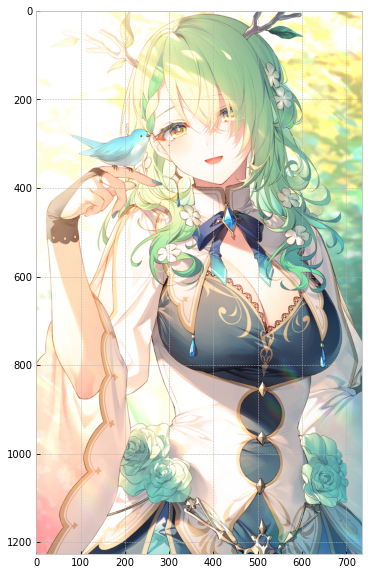

In [73]:
origin = np.array(Image.open('fauna.jpeg'))
plt.imshow(origin)

## 100x60 pixel圖

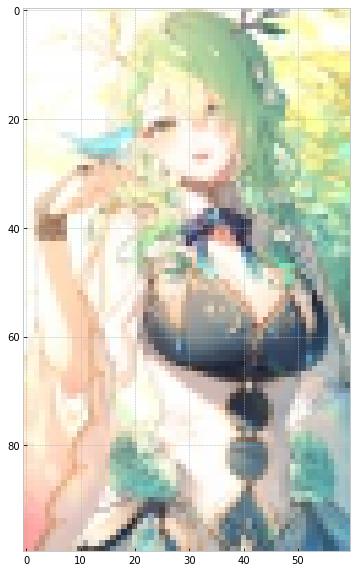

In [103]:
pixels = np.array(Image.open('fauna_h100w60.jpeg'))
plt.imshow(pixels)

## 色階處理<br>
因為256色階太多，所以將256分成8個色階(將0\~255的顏色縮到0\~7，之後無條件捨去取整數再乘回來)

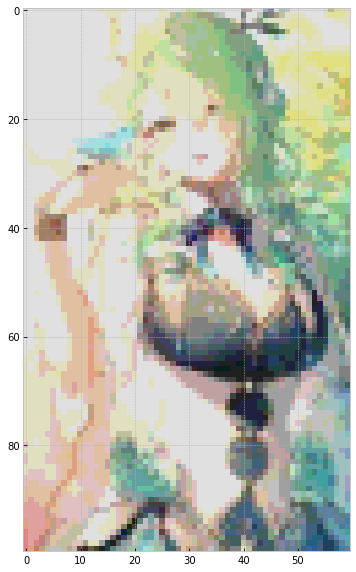

In [104]:
pixels3d = []
for i in range(pixels.shape[0]):
    for j in range(pixels.shape[1]):
        r, g, b = pixels[i][j][0:3]
        r = math.floor(r/256*8)*math.floor(256/8)
        g = math.floor(g/256*8)*math.floor(256/8)
        b = math.floor(b/256*8)*math.floor(256/8)
        pixels3d.append(np.array([r,g,b]))
        # pixels3d.append(pixels[i][j][0:3])

pixels3d = np.array(pixels3d).reshape(100,60,3)
plt.imshow(pixels3d)
# Image.fromarray(pixels3d).resize((500,500), Image.NEAREST)
# pixels3d = pixels3d.astype('float64')
# pixels3d.dtype

## 畫出圖片

In [105]:
palette =  list(set(tuple(x) for x in pixels3d.reshape(-1, 3)))
# palette


In [106]:
reverse_palette = {c:i for i, c in enumerate(palette)}
# reverse_palette

In [107]:
h, w = pixels3d.shape[:2]
X = np.mgrid[0:h, 0:w].reshape(2, -1).T
y = np.array([reverse_palette[tuple(x)] for x in pixels3d.reshape(-1,3)])

X = X.astype('float64')

# X=np.concatenate([X, X+[.1,.1], X+[.1,-.1], X+[-.1,.1], X+[-.1,-.1]])
X = np.concatenate([X,X,X,X,X])
y = np.concatenate([y,y,y,y,y])


In [108]:
cm= LinearSegmentedColormap.from_list(
        "cmm", np.array(palette)/255 )
matplotlib.rcParams['figure.figsize']=(10,10*h/w)

In [109]:
clf=svm.NuSVC(nu=0.001, kernel='rbf',
            decision_function_shape='ovr', gamma=0.7)
X_mean = X.mean(axis=0,keepdims=True)
X_std = X.std()/10
clf.fit((X-X_mean)/X_std, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:800j, y_min:y_max:800j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
Z = clf.predict( (grid.reshape(2, -1).T-X_mean)/X_std)

/tmp/ipykernel_201586/2820215740.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);


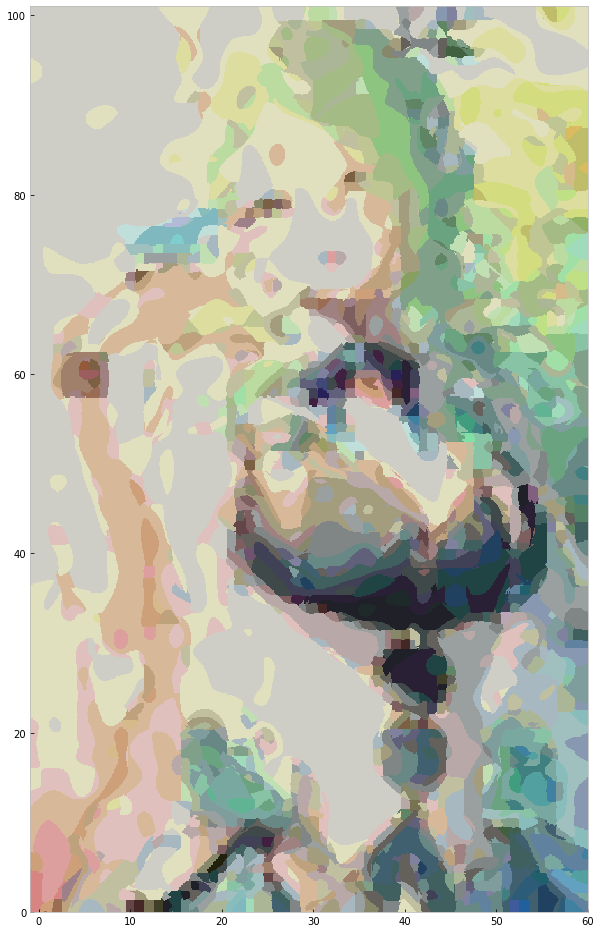

In [110]:
Z  = Z.reshape(grid.shape[1:])
plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);

# minion

## 原圖(去掉a)<br>
因為該圖為png，所以有rgba四維，這裡直接捨棄掉a<br>
由於這張圖只有7個顏色，就不做預處理了

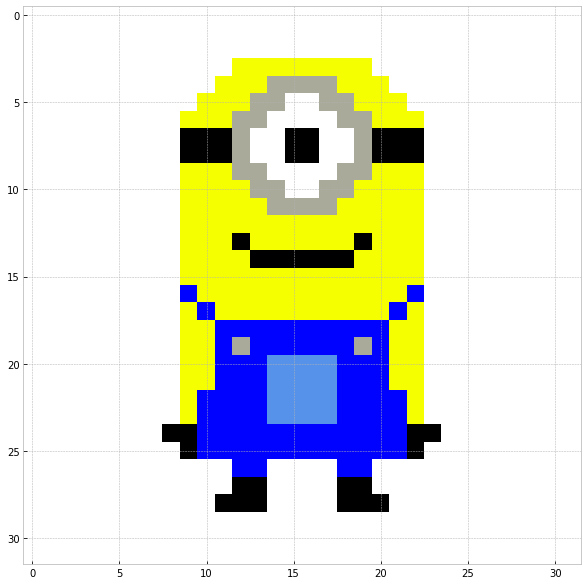

In [111]:
pixels = np.array(Image.open('minion.png'))
pixels3d = []
for i in range(pixels.shape[0]):
    for j in range(pixels.shape[1]):
        pixels3d.append(pixels[i][j][0:3])

pixels3d = np.array(pixels3d).reshape(32,32,3)
plt.imshow(pixels3d)
# Image.fromarray(pixels3d).resize((500,500), Image.NEAREST)
# pixels3d = pixels3d.astype('float64')
# pixels3d.dtype

## 畫出圖形

In [102]:
palette =  list(set(tuple(x) for x in pixels3d.reshape(-1, 3)))
# palette


reverse_palette = {c:i for i, c in enumerate(palette)}
# reverse_palette

h, w = pixels3d.shape[:2]
X = np.mgrid[0:h, 0:w].reshape(2, -1).T
y = np.array([reverse_palette[tuple(x)] for x in pixels3d.reshape(-1,3)])


X = X.astype('float64')

# X=np.concatenate([X, X+[.1,.1], X+[.1,-.1], X+[-.1,.1], X+[-.1,-.1]])
X = np.concatenate([X,X,X,X,X])
y = np.concatenate([y,y,y,y,y])


cm= LinearSegmentedColormap.from_list(
        "cmm", np.array(palette)/255 )
matplotlib.rcParams['figure.figsize']=(10,10*h/w)

In [71]:
clf=svm.NuSVC(nu=0.001, kernel='rbf',
            decision_function_shape='ovr', gamma=0.1)
X_mean = X.mean(axis=0,keepdims=True)
X_std = X.std()/10
clf.fit((X-X_mean)/X_std, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:800j, y_min:y_max:800j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
Z = clf.predict( (grid.reshape(2, -1).T-X_mean)/X_std)

/tmp/ipykernel_201586/2820215740.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);


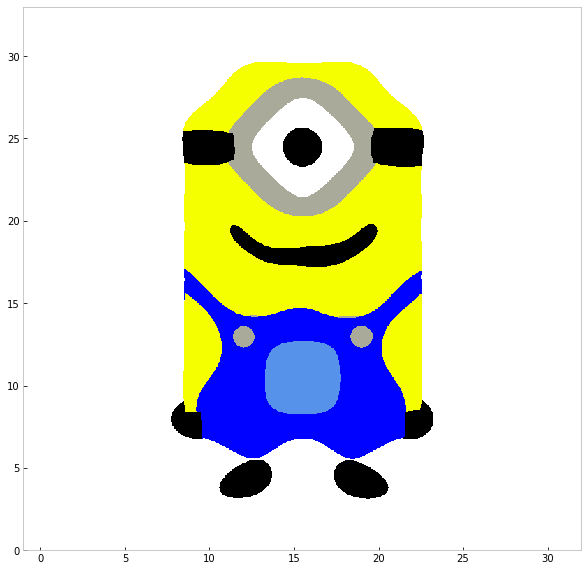

In [72]:
Z  = Z.reshape(grid.shape[1:])
plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);